<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> <em>Dia 8</em>:</span>


# Simulació de particules

### Programa que calcula la trajectoria de particules en una caixa

<br>

<b> Descripció: </b>Aquest programa calcula les posicions i velocitats de particules en una caixa.

<b> Input: </b>Instant de temps. <br>
<b> Output: </b>Posició de les particules en l'instant de temps entrat.

<b> Problemes: </b>
<ol>

<li> El sistema físic simulat és molt simple i no és interactuable.</li>
<li> Actualització lenta del gràfic. </li>
<li> No és possible animar un <em>scatter plot</em> o com a mínim no s'ha aconseguit encara. Check <a href:http://stackoverflow.com/questions/14358284/python-how-do-i-animate-my-scatterplot> stackoverflow </a> per més informació</li>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 7](Estudi d'un text.ipynb) </span>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 9](Camp electric.ipynb) </span>

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as wdg

%matplotlib inline

In [2]:
def getComponents(pos, velo, t):
    
    caixa = [[0,5],[0,5]]
    
    posicio = pos+np.array(velo)*t
    
    if posicio[0] > caixa[0][1] or posicio[0] < caixa[0][0]:
        velo[0] = -velo[0]
    if posicio[1] < caixa[1][0] or posicio[1] > caixa[1][1]:
        velo[1] = -velo[1]
        
    return posicio, velo

In [9]:
caixa = [[0,5],[0,5]]
temps = 10.
step = 0.02
dataComp = []
npart = 12

for j in range(npart):
    
    velocitat = 5*np.array([np.random.rand(), np.random.rand()*(-1)**np.random.randint(0,2)])
    posicio = np.array([0,2.5])

    colPosX = [posicio[0]]
    colPosY = [posicio[1]]
    colTemps = [step]
    colVeloX = [velocitat[0]]
    colVeloY = [velocitat[1]]

    for i in range(int(temps/step)):

        act = getComponents([colPosX[i], colPosY[i]], [colVeloX[i], colVeloY[i]], step)

        colPosX.append(act[0][0])
        colVeloX.append(act[1][0])
        colPosY.append(act[0][1])
        colVeloY.append(act[1][1])
        colTemps.append(step*i)
    
    dataComp.append(pd.DataFrame(data=np.vstack([colPosX, colPosY, colVeloX, colVeloY, colTemps]).T, columns=["PosX", "PosY", "VeloX", "VeloY", "Temps"]))

In [4]:
sFrame = wdg.IntSlider(min=0, max=temps/step, description="Imatge")

In [5]:
def funcioPlot(frame):
    
    plt.figure(figsize=(12,8))
    axes = plt.gca()

    axes.set_ylim(0,5)
    axes.set_xlim(0,5)
    
    for i in range(npart):
        dc = dataComp[i]
        plt.scatter(dc.PosX[frame:frame+5], dc.PosY[frame:frame+5], color="orange")

    plt.show()

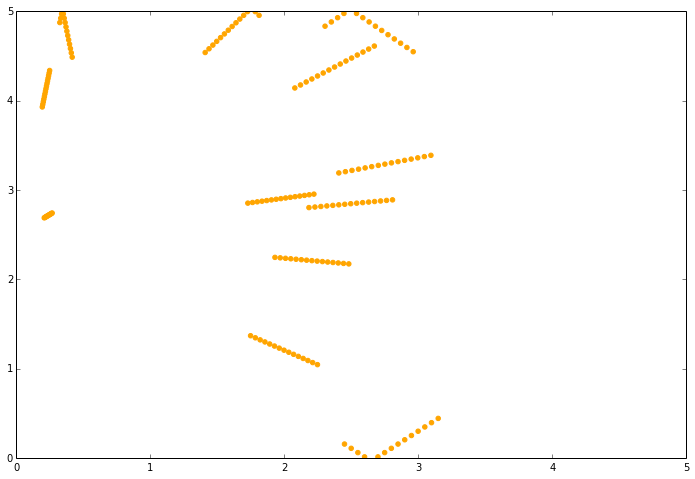

In [10]:
wdg.interactive(funcioPlot, frame = sFrame)